In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('random_smartphone_usage_dataset.csv')

# Display basic information about the data
data.head()

,User_ID,Daily_Screen_Time_Min,Daily_App_Opens,Primary_App_Category,Notifications_Received,Battery_Used_%
0,1,162,27,Social,262,79
1,2,408,141,Social,105,41
2,3,330,98,Social,85,77
3,4,166,69,Gaming,189,64
4,5,131,23,Productivity,64,84


In [6]:
# Data exploration
print("\nDATASET STATISTICS:")
print("=" * 60)
print(data.describe())
print("\n")

print("PRIMARY APP CATEGORY DISTRIBUTION:")
print("=" * 60)
print(data['Primary_App_Category'].value_counts())



DATASET STATISTICS:
        User_ID  Daily_Screen_Time_Min  Daily_App_Opens  \
count  50.00000              50.000000        50.000000   
mean   25.50000             264.360000        95.960000   
std    14.57738             112.632282        58.535515   
min     1.00000              80.000000        11.000000   
25%    13.25000             169.750000        50.750000   
50%    25.50000             248.500000        92.000000   
75%    37.75000             367.500000       141.000000   
max    50.00000             473.000000       199.000000   

       Notifications_Received  Battery_Used_%  
count               50.000000       50.000000  
mean               164.920000       53.560000  
std                 68.308376       27.385502  
min                 21.000000       10.000000  
25%                121.750000       28.250000  
50%                154.500000       54.000000  
75%                232.000000       78.000000  
max                287.000000       99.000000  


PRIMARY APP C

In [7]:
# Data preprocessing
# Create a target variable based on battery usage patterns
# Classify as 'High Battery Drain' if Battery_Used_% >= 50, else 'Normal Battery Drain'
data['Battery_Class'] = (data['Battery_Used_%'] >= 50).astype(int)

# Convert categorical variable to numerical
le = LabelEncoder()
data['Primary_App_Category_Encoded'] = le.fit_transform(data['Primary_App_Category'])

# Map the encoded values for reference
category_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("APP CATEGORY ENCODING MAPPING:")
print("=" * 60)
for code, category in category_mapping.items():
    print(f"{code}: {category}")


APP CATEGORY ENCODING MAPPING:
0: Education
1: Entertainment
2: Gaming
3: Productivity
4: Social


In [8]:
# Features and target variable
features = ['Daily_Screen_Time_Min', 'Daily_App_Opens', 'Primary_App_Category_Encoded', 'Notifications_Received']
X = data[features]
y = data['Battery_Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (important for some Naive Bayes variants, though GaussianNB is less sensitive)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTRAINING/TEST SET INFORMATION:")
print("=" * 60)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Positive class (High Battery Drain) in training: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.1f}%)")
print(f"Positive class (High Battery Drain) in test: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.1f}%)")


TRAINING/TEST SET INFORMATION:
Training set size: 35 samples
Test set size: 15 samples
Positive class (High Battery Drain) in training: 18 (51.4%)
Positive class (High Battery Drain) in test: 8 (53.3%)


In [9]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_scaled)
y_pred_proba = nb_model.predict_proba(X_test_scaled)[:, 1]


In [10]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Display results
print("\nNAIVE BAYES MODEL PERFORMANCE METRICS:")
print("=" * 60)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\n" + "=" * 60)
print("CONFUSION MATRIX:")
print("=" * 60)
print("Format:")
print("[[True Negatives (TN)   False Positives (FP)]")
print(" [False Negatives (FN)  True Positives (TP)]]")
print("\nActual Values:")
print(conf_matrix)

print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['Normal Battery (0)', 'High Battery Drain (1)']))


NAIVE BAYES MODEL PERFORMANCE METRICS:
Accuracy: 0.6000
Precision: 0.6250
Recall: 0.6250
F1-Score: 0.6250

CONFUSION MATRIX:
Format:
[[True Negatives (TN)   False Positives (FP)]
 [False Negatives (FN)  True Positives (TP)]]

Actual Values:
[[4 3]
 [3 5]]

DETAILED CLASSIFICATION REPORT:
                        precision    recall  f1-score   support

    Normal Battery (0)       0.57      0.57      0.57         7
High Battery Drain (1)       0.62      0.62      0.62         8

              accuracy                           0.60        15
             macro avg       0.60      0.60      0.60        15
          weighted avg       0.60      0.60      0.60        15



In [11]:
# Calculate probabilities for each class
print("\n" + "=" * 60)
print("PREDICTION PROBABILITIES (First 5 Test Samples):")
print("=" * 60)
for i in range(min(5, len(X_test))):
    proba = nb_model.predict_proba(X_test_scaled[i:i+1])[0]
    print(f"Sample {i+1}: P(Normal)={proba[0]:.4f}, P(High Drain)={proba[1]:.4f}")


PREDICTION PROBABILITIES (First 5 Test Samples):
Sample 1: P(Normal)=0.3323, P(High Drain)=0.6677
Sample 2: P(Normal)=0.4203, P(High Drain)=0.5797
Sample 3: P(Normal)=0.2984, P(High Drain)=0.7016
Sample 4: P(Normal)=0.6134, P(High Drain)=0.3866
Sample 5: P(Normal)=0.6630, P(High Drain)=0.3370


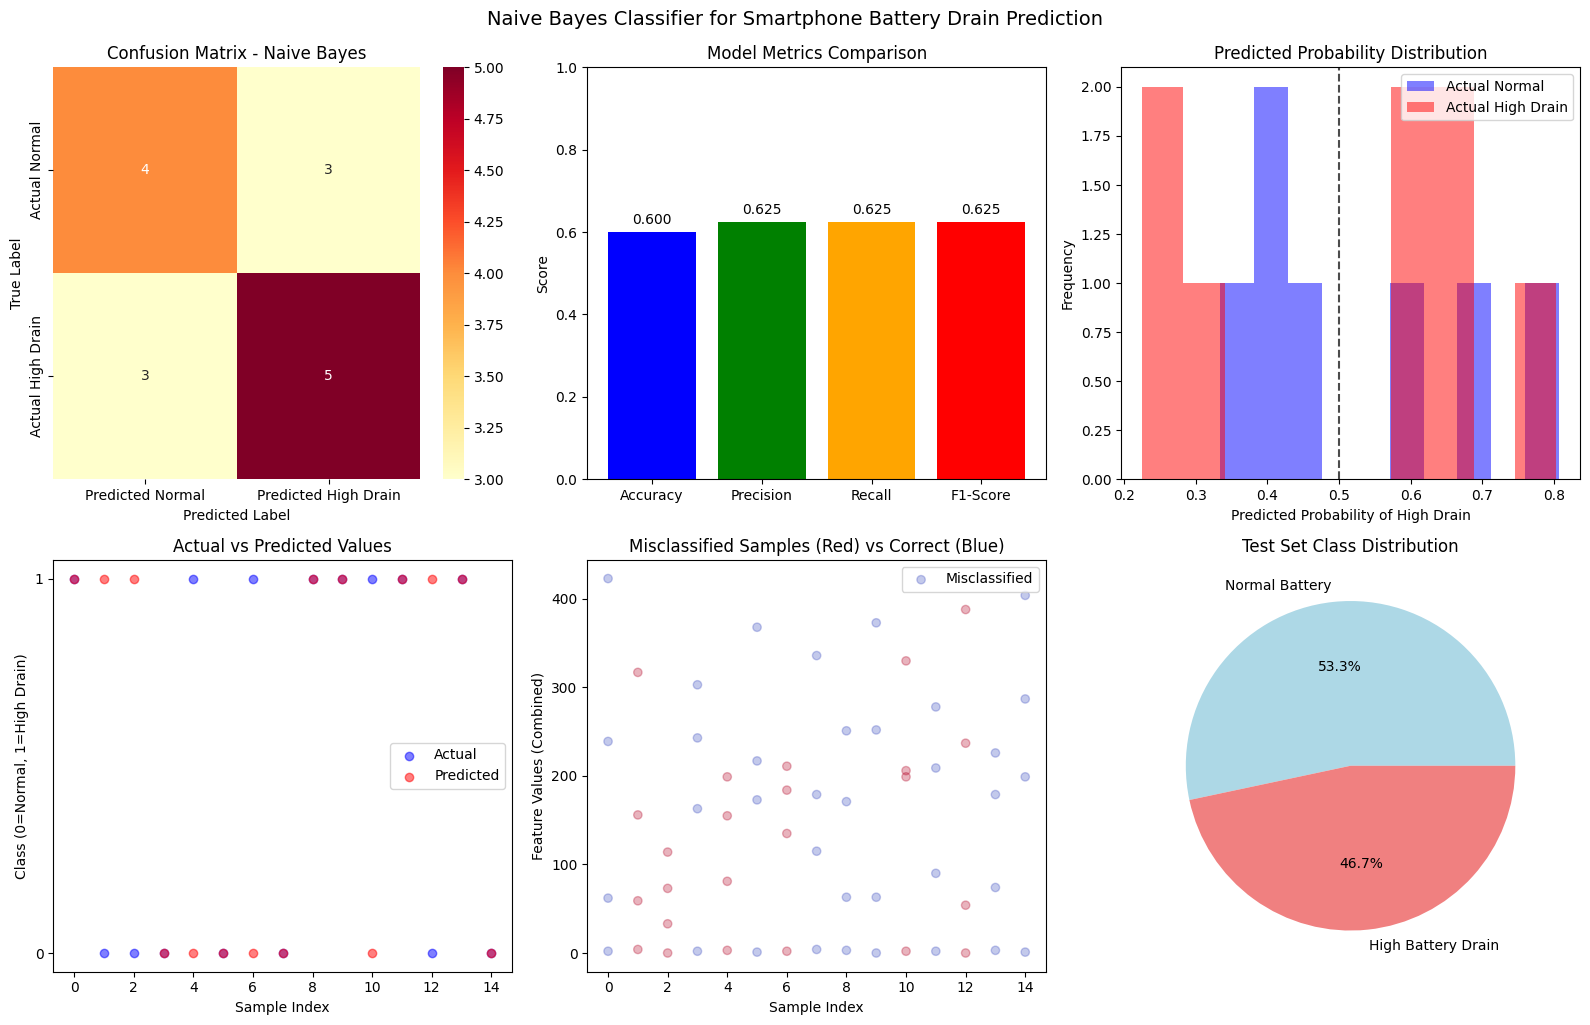

In [12]:
# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=['Predicted Normal', 'Predicted High Drain'],
            yticklabels=['Actual Normal', 'Actual High Drain'],
            ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Naive Bayes')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# 2. Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
axes[0, 1].bar(metrics, values, color=colors)
axes[0, 1].set_title('Model Metrics Comparison')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_ylim([0, 1])
for i, v in enumerate(values):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center')

# 3. Probability Distribution
axes[0, 2].hist(y_pred_proba[y_test == 0], alpha=0.5, label='Actual Normal', color='blue', bins=10)
axes[0, 2].hist(y_pred_proba[y_test == 1], alpha=0.5, label='Actual High Drain', color='red', bins=10)
axes[0, 2].set_title('Predicted Probability Distribution')
axes[0, 2].set_xlabel('Predicted Probability of High Drain')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()
axes[0, 2].axvline(x=0.5, color='black', linestyle='--', alpha=0.7)

# 4. Actual vs Predicted
axes[1, 0].scatter(range(len(y_test)), y_test, alpha=0.5, label='Actual', color='blue')
axes[1, 0].scatter(range(len(y_test)), y_pred, alpha=0.5, label='Predicted', color='red')
axes[1, 0].set_title('Actual vs Predicted Values')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Class (0=Normal, 1=High Drain)')
axes[1, 0].legend()
axes[1, 0].set_yticks([0, 1])

# 5. Feature comparison for misclassified samples
misclassified = y_test != y_pred
correctly_classified = y_test == y_pred

if len(misclassified) > 0:
    for feature_idx, feature_name in enumerate(features):
        axes[1, 1].scatter(range(len(X_test)), X_test[feature_name].values, 
                          alpha=0.3, c=misclassified, cmap='coolwarm', 
                          label='Misclassified' if feature_idx == 0 else "")
    axes[1, 1].set_title('Misclassified Samples (Red) vs Correct (Blue)')
    axes[1, 1].set_xlabel('Sample Index')
    axes[1, 1].set_ylabel('Feature Values (Combined)')
    axes[1, 1].legend()

# 6. Class distribution
class_counts = pd.Series(y_test).value_counts()
axes[1, 2].pie(class_counts.values, labels=['Normal Battery', 'High Battery Drain'], 
               autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[1, 2].set_title('Test Set Class Distribution')

plt.tight_layout()
plt.suptitle('Naive Bayes Classifier for Smartphone Battery Drain Prediction', 
             fontsize=14, y=1.02)
plt.show()


In [13]:
# Print detailed confusion matrix analysis
print("\n" + "=" * 60)
print("CONFUSION MATRIX DETAILED ANALYSIS:")
print("=" * 60)
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (TN): {tn} - Correctly predicted Normal battery usage")
print(f"False Positives (FP): {fp} - Incorrectly predicted High drain (Type I Error)")
print(f"False Negatives (FN): {fn} - Incorrectly predicted Normal (Type II Error)")
print(f"True Positives (TP): {tp} - Correctly predicted High battery drain")
print(f"\nTotal Test Samples: {len(y_test)}")
print(f"Correct Predictions: {tn + tp} ({((tn + tp)/len(y_test))*100:.1f}%)")
print(f"Incorrect Predictions: {fp + fn} ({((fp + fn)/len(y_test))*100:.1f}%)")


CONFUSION MATRIX DETAILED ANALYSIS:
True Negatives (TN): 4 - Correctly predicted Normal battery usage
False Positives (FP): 3 - Incorrectly predicted High drain (Type I Error)
False Negatives (FN): 3 - Incorrectly predicted Normal (Type II Error)
True Positives (TP): 5 - Correctly predicted High battery drain

Total Test Samples: 15
Correct Predictions: 9 (60.0%)
Incorrect Predictions: 6 (40.0%)


In [14]:
# Additional metrics derived from confusion matrix
print("\n" + "=" * 60)
print("DERIVED METRICS FROM CONFUSION MATRIX:")
print("=" * 60)
print(f"Error Rate: {(fp + fn)/(tp + tn + fp + fn):.4f}")
print(f"False Positive Rate: {fp/(fp + tn):.4f}")
print(f"False Negative Rate: {fn/(fn + tp):.4f}")
print(f"True Negative Rate (Specificity): {tn/(tn + fp):.4f}")
print(f"True Positive Rate (Recall/Sensitivity): {tp/(tp + fn):.4f}")
print(f"Positive Predictive Value (Precision): {tp/(tp + fp):.4f}")
print(f"Negative Predictive Value: {tn/(tn + fn):.4f}")


DERIVED METRICS FROM CONFUSION MATRIX:
Error Rate: 0.4000
False Positive Rate: 0.4286
False Negative Rate: 0.3750
True Negative Rate (Specificity): 0.5714
True Positive Rate (Recall/Sensitivity): 0.6250
Positive Predictive Value (Precision): 0.6250
Negative Predictive Value: 0.5714


In [15]:
# Naive Bayes specific statistics
print("\n" + "=" * 60)
print("NAIVE BAYES MODEL STATISTICS:")
print("=" * 60)
print("Class Priors (Probability of each class):")
for i, prior in enumerate(nb_model.class_prior_):
    class_name = 'Normal Battery' if i == 0 else 'High Battery Drain'
    print(f"  {class_name}: {prior:.4f}")

print("\nMean of features per class:")
for i, class_name in enumerate(['Normal Battery', 'High Battery Drain']):
    print(f"\n{class_name}:")
    for j, feature_name in enumerate(features):
        print(f"  {feature_name}: {nb_model.theta_[i][j]:.2f}")

print("\nVariance of features per class:")
for i, class_name in enumerate(['Normal Battery', 'High Battery Drain']):
    print(f"\n{class_name}:")
    for j, feature_name in enumerate(features):
        print(f"  {feature_name}: {nb_model.var_[i][j]:.2f}")


NAIVE BAYES MODEL STATISTICS:
Class Priors (Probability of each class):
  Normal Battery: 0.4857
  High Battery Drain: 0.5143

Mean of features per class:

Normal Battery:
  Daily_Screen_Time_Min: 0.01
  Daily_App_Opens: 0.30
  Primary_App_Category_Encoded: 0.11
  Notifications_Received: -0.16

High Battery Drain:
  Daily_Screen_Time_Min: -0.01
  Daily_App_Opens: -0.28
  Primary_App_Category_Encoded: -0.10
  Notifications_Received: 0.15

Variance of features per class:

Normal Battery:
  Daily_Screen_Time_Min: 1.03
  Daily_App_Opens: 0.99
  Primary_App_Category_Encoded: 0.85
  Notifications_Received: 1.01

High Battery Drain:
  Daily_Screen_Time_Min: 0.97
  Daily_App_Opens: 0.85
  Primary_App_Category_Encoded: 1.12
  Notifications_Received: 0.95


In [16]:
# Example predictions with detailed information
print("\n" + "=" * 60)
print("DETAILED EXAMPLE PREDICTIONS:")
print("=" * 60)
print("Test Set Sample Predictions (5 examples):")
sample_indices = np.random.choice(len(X_test), min(5, len(X_test)), replace=False)

for idx in sample_indices:
    actual = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
    predicted = y_pred[idx]
    proba = y_pred_proba[idx]
    student_data = X_test.iloc[idx] if hasattr(X_test, 'iloc') else X_test[idx]
    original_category = category_mapping[student_data['Primary_App_Category_Encoded']]
    
    print(f"\n{'━' * 40}")
    print(f"Sample {idx}:")
    print(f"  Features:")
    print(f"    Daily Screen Time: {student_data['Daily_Screen_Time_Min']:.0f} min")
    print(f"    Daily App Opens: {student_data['Daily_App_Opens']:.0f}")
    print(f"    Primary App Category: {original_category}")
    print(f"    Notifications Received: {student_data['Notifications_Received']:.0f}")
    print(f"  Prediction:")
    print(f"    Probability of High Drain: {proba:.4f}")
    print(f"    Predicted Class: {'High Battery Drain' if predicted == 1 else 'Normal Battery'}")
    print(f"    Actual Class: {'High Battery Drain' if actual == 1 else 'Normal Battery'}")
    print(f"    Result: {'CORRECT' if predicted == actual else 'INCORRECT'}")

print(f"\n{'━' * 40}")




DETAILED EXAMPLE PREDICTIONS:
Test Set Sample Predictions (5 examples):

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Sample 5:
  Features:
    Daily Screen Time: 368 min
    Daily App Opens: 173
    Primary App Category: Entertainment
    Notifications Received: 217
  Prediction:
    Probability of High Drain: 0.3816
    Predicted Class: Normal Battery
    Actual Class: Normal Battery
    Result: CORRECT

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Sample 4:
  Features:
    Daily Screen Time: 81 min
    Daily App Opens: 155
    Primary App Category: Productivity
    Notifications Received: 199
  Prediction:
    Probability of High Drain: 0.3370
    Predicted Class: Normal Battery
    Actual Class: High Battery Drain
    Result: INCORRECT

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Sample 8:
  Features:
    Daily Screen Time: 251 min
    Daily App Opens: 63
    Primary App Category: Productivity
    Notifications Received: 171
  Prediction:
    Probability of High Drain: 0.5904
    Predicted C

In [17]:
# Model interpretation
print("\n" + "=" * 60)
print("MODEL INTERPRETATION:")
print("=" * 60)
print("1. Naive Bayes assumes feature independence (naive assumption)")
print("2. Based on Gaussian distribution of features")
print("3. Computes posterior probability using Bayes' theorem:")
print("   P(Class|Features) ∝ P(Class) × Π P(Feature|Class)")
print("4. Decision boundary is based on comparing posterior probabilities")

# Calculate and display the decision boundary characteristics
print("\n" + "=" * 60)
print("DECISION BOUNDARY ANALYSIS:")
print("=" * 60)
decision_boundary_crossings = np.sum((y_pred_proba[:-1] < 0.5) & (y_pred_proba[1:] >= 0.5)) + \
                              np.sum((y_pred_proba[:-1] >= 0.5) & (y_pred_proba[1:] < 0.5))
print(f"Number of decision boundary crossings in test set: {decision_boundary_crossings}")
print(f"Average predicted probability: {np.mean(y_pred_proba):.4f}")
print(f"Standard deviation of probabilities: {np.std(y_pred_proba):.4f}")


MODEL INTERPRETATION:
1. Naive Bayes assumes feature independence (naive assumption)
2. Based on Gaussian distribution of features
3. Computes posterior probability using Bayes' theorem:
   P(Class|Features) ∝ P(Class) × Π P(Feature|Class)
4. Decision boundary is based on comparing posterior probabilities

DECISION BOUNDARY ANALYSIS:
Number of decision boundary crossings in test set: 5
Average predicted probability: 0.5147
Standard deviation of probabilities: 0.1866


In [18]:
import joblib

joblib.dump(nb_model, "nb_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']